In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [90]:
import pandas as pd
import numpy as np
from numpy import interp
import matplotlib.pyplot as plt 
import matplotlib.patches as patches

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import plot_roc_curve

from sklearn.metrics import roc_curve,auc


In [91]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
x = train.drop(['PassengerId','Survived', 'Name','Ticket', 'Cabin', 'Embarked'], axis=1)
x['Sex'] = x['Sex'].replace(['female','male'],[0,1])
x['Age'].fillna((x['Age'].mean()), inplace=True)
y = train['Survived']

In [93]:
X.describe(include='all')

,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [94]:
cv = StratifiedKFold(n_splits=5,shuffle=False)


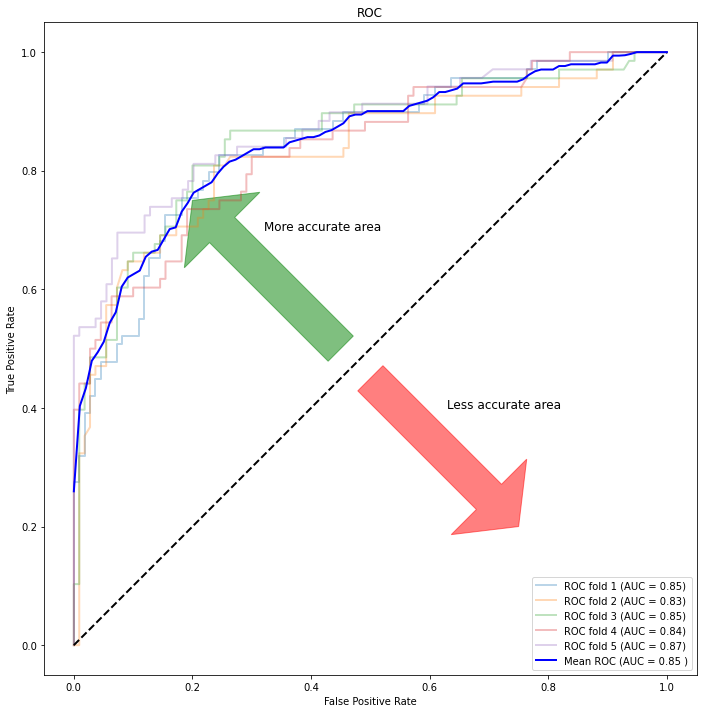

In [95]:
# plot arrows
clf = LogisticRegression(solver = 'lbfgs')
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [96]:
print (f'Accuracy - : {clf.score(X,y):.3f}')

Accuracy - : 0.800


In [97]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test_all = test.copy()
test = test.drop(['PassengerId', 'Name','Ticket', 'Cabin', 'Embarked'], axis=1)
test['Sex'] = test['Sex'].replace(['female','male'],[0,1])
test['Age'].fillna((test['Age'].mean()), inplace=True)
test['Fare'].fillna((test['Fare'].mean()), inplace=True)
test.describe(include='all')

,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188
std,0.841838,0.481622,12.634534,0.896760,0.981429,55.840500
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,1.000000,30.272590,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


In [98]:
predictions = clf.predict(test)

output = pd.DataFrame({'PassengerId': test_all.PassengerId, 'Survived': predictions})
output.to_csv('logistic_submission.csv', index=False)

## Gaussian Model

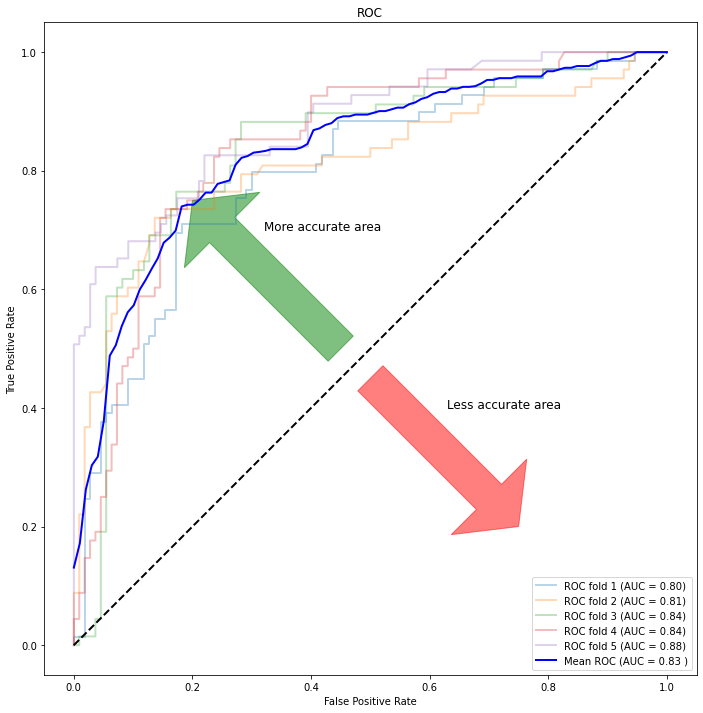

In [99]:
# plot arrows
clf = GaussianNB()
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [100]:
print (f'Accuracy - : {clf.score(X,y):.3f}')


Accuracy - : 0.799


In [101]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test_all = test.copy()
test = test.drop(['PassengerId', 'Name','Ticket', 'Cabin', 'Embarked'], axis=1)
test['Sex'] = test['Sex'].replace(['female','male'],[0,1])
test['Age'].fillna((test['Age'].mean()), inplace=True)
test['Fare'].fillna((test['Fare'].mean()), inplace=True)
test.describe(include='all')

,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188
std,0.841838,0.481622,12.634534,0.896760,0.981429,55.840500
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,1.000000,30.272590,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


In [102]:
predictions = clf.predict(test)

output = pd.DataFrame({'PassengerId': test_all.PassengerId, 'Survived': predictions})
output.to_csv('gaussian_submission.csv', index=False)

## GridSearch Logistic Regression

In [103]:
logModel = LogisticRegression()
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [104]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [108]:
best_clf = clf.fit(x,y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.61616162 ...        nan 0.79349046 0.77104377]
  category=UserWarning


In [106]:
best_clf.best_estimator_
print (f'Accuracy - : {best_clf.score(x ,y):.3f}')

Accuracy - : 0.796


In [107]:
best_clf.best_estimator_


LogisticRegression(C=1.623776739188721, max_iter=5000, solver='sag')

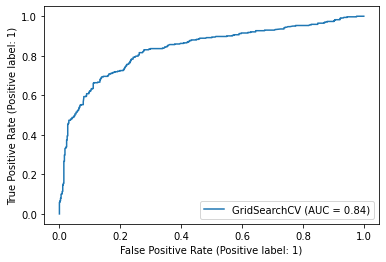

In [111]:
from sklearn import metrics
metrics.plot_roc_curve(best_clf, x, y) 